In [2]:
!pip install hopsworks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 13.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 6.5 MB/s eta 0:00:00
  Preparing meta

In [1]:
import hopsworks
import pandas as pd

In [2]:
project = hopsworks.login()
fs = project.get_feature_store()

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Multiple projects found. 

	 (1) suyiw000
	 (2) ID2223Puyao

Enter project to access: 1

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/193695
Connected. Call `.close()` to terminate connection gracefully.


In [23]:
food_fg = fs.get_feature_group(name="food", version=1)
query = food_fg.select_all()
feature_view = fs.get_or_create_feature_view(name="food",
                                  version=1,
                                  description="Read from Food price predict dataset",
                                  labels=["price"],
                                  query=query)

In [ ]:
pip install hops

In [33]:
df = feature_view.features

In [50]:
 df = feature_view.training_data()

Finished: Reading data from Hopsworks, using ArrowFlight (1.45s) 


/usr/local/lib/python3.10/dist-packages/hsfs/feature_view.py:1661: VersionWarning: Incremented version to `6`.


In [51]:
df

(         market                  commodity  date_int
 0       Laghman         Rice (low quality)  20220915
 1       Badghis                      Sugar  20200515
 2        Faryab        Rice (high quality)  20210215
 3       Baghlan                      Sugar  20210415
 4       Jawzjan  Wheat flour (low quality)  20220515
 ...         ...                        ...       ...
 14933  Nuristan                      Wheat  20200815
 14934    Takhar         Rice (low quality)  20210815
 14935     Balkh                      Sugar  20230315
 14936     Hirat                      Bread  20210115
 14937   Paktika  Wheat flour (low quality)  20210715
 
 [14938 rows x 3 columns],
        price
 0       42.0
 1       52.5
 2       94.0
 3       50.0
 4      44.97
 ...      ...
 14933   35.0
 14934  46.69
 14935  69.19
 14936   50.0
 14937  31.22
 
 [14938 rows x 1 columns])

In [52]:
food_df = pd.concat(df, axis=1)

In [53]:
food_df

,market,commodity,date_int,price
0,Laghman,Rice (low quality),20220915,42.0
1,Badghis,Sugar,20200515,52.5
2,Faryab,Rice (high quality),20210215,94.0
3,Baghlan,Sugar,20210415,50.0
4,Jawzjan,Wheat flour (low quality),20220515,44.97
...,...,...,...,...
14933,Nuristan,Wheat,20200815,35.0
14934,Takhar,Rice (low quality),20210815,46.69
14935,Balkh,Sugar,20230315,69.19
14936,Hirat,Bread,20210115,50.0


In [54]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(food_df[['market', 'commodity']])

food_df_date = food_df.copy()
food_df_date['date_int'] = (food_df['date_int']-20200000)/10000

encoded_df = pd.concat([pd.DataFrame(encoded_data.toarray()), food_df_date['date_int'], food_df['price']], axis=1)

encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,date_int,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0915,42.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0515,52.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0215,94.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0415,50.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0515,44.97


In [55]:
encoded_df['price'] = encoded_df['price'].astype('float64')

In [56]:
X = encoded_df.iloc[:, :-1]
Y = encoded_df.iloc[:, -1]
print(X)
# print(Y)

         0    1    2    3    4    5    6    7    8    9  ...   35   36   37  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
3      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14933  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
14934  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
14935  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
14936  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
14937  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        38   39   40   41   42   43  date_int  
0  

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [58]:
df = X_train.rename(columns={'date_int': 44}, inplace=True)
df = X_test.rename(columns={'date_int': 44}, inplace=True)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11950 entries, 0 to 11949
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11950 non-null  float64
 1   1       11950 non-null  float64
 2   2       11950 non-null  float64
 3   3       11950 non-null  float64
 4   4       11950 non-null  float64
 5   5       11950 non-null  float64
 6   6       11950 non-null  float64
 7   7       11950 non-null  float64
 8   8       11950 non-null  float64
 9   9       11950 non-null  float64
 10  10      11950 non-null  float64
 11  11      11950 non-null  float64
 12  12      11950 non-null  float64
 13  13      11950 non-null  float64
 14  14      11950 non-null  float64
 15  15      11950 non-null  float64
 16  16      11950 non-null  float64
 17  17      11950 non-null  float64
 18  18      11950 non-null  float64
 19  19      11950 non-null  float64
 20  20      11950 non-null  float64
 21  21      11950 non-null  float64
 22

In [62]:
#model implementation

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

# RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
# RFR.fit(X_train,y_train)
# y_pred = RFR.predict(X_test)

knn = KNeighborsRegressor(6)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=6)

In [63]:
y_pred = knn.predict(X_test)

In [67]:
#function for evaluation of model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
import numpy as np

def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)


In [68]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))

MSLE : 0.007829757673967784
Root MSLE : 0.08848591794160121
R2 Score : 0.9669016164358833 or 96.6902%


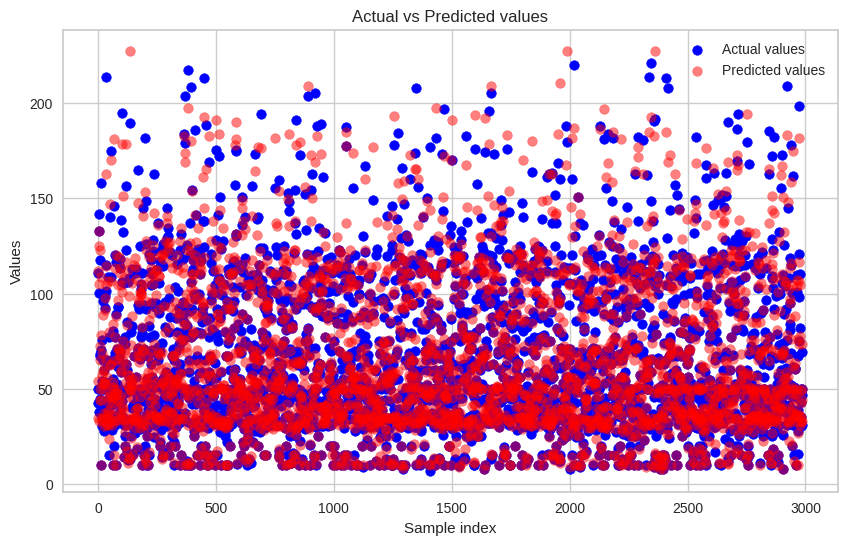

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual values')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted values')
plt.title('Actual vs Predicted values')
plt.xlabel('Sample index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [76]:
import os
import joblib
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

# We will now upload our model to the Hopsworks Model Registry. First get an object for the model registry.
mf = project.get_model_registry()
model=knn
# The contents of the 'food_model' directory will be saved to the model registry. Create the dir, first.
model_dir="food_model"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)

# Save our model to 'model_dir', whose contents will be uploaded to the model registry
joblib.dump(model, model_dir + "/food_model.pkl")


# Specify the schema of the model's input/output using the features (X_train) and labels (y_train)
input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema, output_schema)

# Create an entry in the model registry that includes the model's name, desc, metrics
food_model = mf.python.create_model(
    name="food_model",
    model_schema=model_schema,
    description="Food Price Predictor"
)

# Upload the model to the model registry, including all files in 'model_dir'
food_model.save(model_dir)

Connected. Call `.close()` to terminate connection gracefully.


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/4398260 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/3096 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/193695/models/food_model/1


Model(name: 'food_model', version: 1)

In [80]:
model_predict = mf.get_model("food_model", version=1)
model_dir = model_predict.download()
model_predict = joblib.load(model_dir + "/food_model.pkl")
print("Model downloaded")

Model downloaded


In [81]:
market_empty = np.zeros(34)
market_name = ['Badakhshan', 'Badghis', 'Baghlan', 'Balkh', 'Bamyan', 'Daykundi', 'Farah', 'Faryab', 'Ghazni', 'Ghor', 'Hilmand', 'Hirat', 'Jawzjan' 'Kabul', 'Kandahar', 'Kapisa', 'Khost', 'Kunar', 'Kunduz', 'Laghman', 'Logar', 'Maidan Wardak', 'Nangarhar', 'Nimroz', 'Nuristan', 'Paktika', 'Paktya', 'Panjsher', 'Parwan', 'Samangan', 'Sar-e-Pul', 'Takhar', 'Uruzgan', 'Zabul']
market = []
for i in range(34):
  temp_market = market_empty.copy()
  temp_market[i] = 1.0
  market.append(temp_market)

commodity_empty = np.zeros(10)
commodity_name = ['Bread', 'Oil_cooking', 'Pulses', 'Rice_high', 'Rice_low', 'Salt', 'Sugar', 'Wheat', 'Wheatflour_high', 'Wheatflour_low']
commodity=[]
for i in range(10):
  commodity_array = commodity_empty.copy()
  commodity_array[i] = 1.0
  commodity.append(commodity_array)

commodity_with_names = dict(zip(commodity_name, commodity))
arrays_with_names = dict(zip(market_name, market))

date = ((2023*10000+12*100+15)-20200000)/100000

input_data = np.concatenate([arrays_with_names['Badakhshan'], commodity_with_names['Bread'], [date]]).reshape(1, -1)

prediction = model_predict.predict(input_data)
print(prediction)

[50.]
